<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/A21_ML_Combined_YR/A21_ML_CombinedA1_YR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Assignment 1

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/nba_2013.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv(path)
print(df.shape)
df.head()

(481, 31)


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [ ]:
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace = True)

In [ ]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098467,50.855639,132.751732,0.146218,147.223161,294.174554,0.104121,0.099344,103.667725,131.240639,0.156794,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.401000,0.000000,3.000000,0.262626,31.000000,67.000000,0.434783,0.451000,16.000000,22.000000,0.657000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.437000,16.000000,48.000000,0.314607,110.000000,227.000000,0.473779,0.487000,53.000000,73.000000,0.750000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479000,68.000000,193.000000,0.366460,230.000000,459.000000,0.513120,0.525000,126.000000,179.000000,0.816000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [ ]:
# this assignment requires us to use knn method to predict the point scored by
# NBA player in the season 2013-14

In [ ]:
df.pos.unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [ ]:
df.bref_team_id.unique()

array(['TOT', 'OKC', 'ORL', 'NOP', 'NYK', 'POR', 'MIA', 'MEM', 'BRK',
       'PHI', 'MIL', 'ATL', 'WAS', 'GSW', 'DEN', 'HOU', 'SAS', 'BOS',
       'PHO', 'MIN', 'LAC', 'CLE', 'UTA', 'DET', 'CHA', 'DAL', 'CHI',
       'LAL', 'IND', 'TOR', 'SAC'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


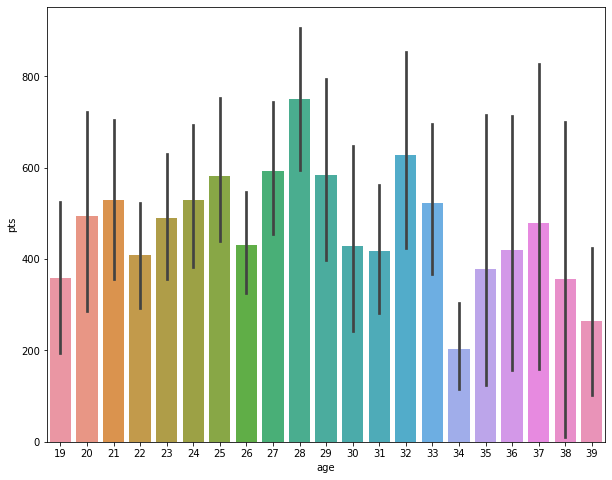

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(df.age, df.pts )
plt.show()

In [ ]:
data = df.copy()

In [ ]:
df.drop(columns=['player', 'season', 'season_end', 'bref_team_id'], inplace = True)

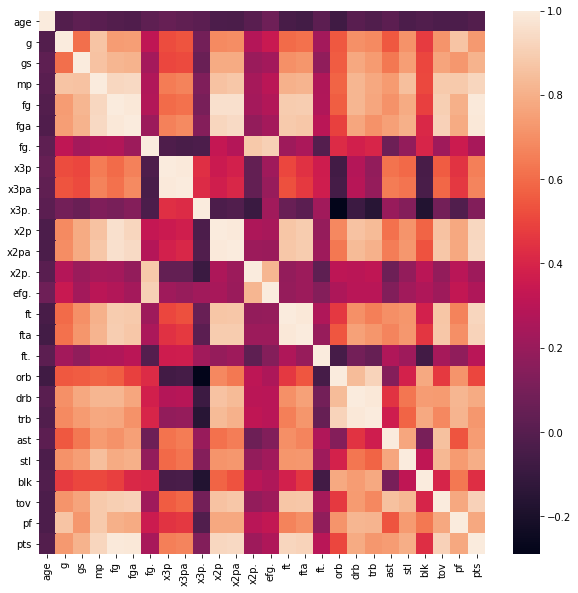

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [ ]:
df.corr()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
age,1.000000,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025202,0.050611,0.028850,0.013502,-0.028862,-0.035970,0.011269,0.072948,-0.046554,-0.061751,0.021028,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910
g,-0.012074,1.000000,0.610951,0.864487,0.739993,0.746963,0.319534,0.518074,0.537011,0.090602,0.684729,0.694243,0.279659,0.348972,0.598333,0.615001,0.230984,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462
gs,0.025163,0.610951,1.000000,0.860036,0.821619,0.811531,0.234312,0.501808,0.515718,0.060238,0.785619,0.784812,0.204808,0.230862,0.707049,0.720527,0.175760,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294
mp,0.007961,0.864487,0.860036,1.000000,0.931120,0.936883,0.272614,0.645056,0.666126,0.126887,0.863941,0.874109,0.242328,0.303580,0.805468,0.814450,0.267677,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464
fg,-0.009749,0.739993,0.821619,0.931120,1.000000,0.988262,0.277273,0.597239,0.613988,0.103701,0.960853,0.962059,0.237550,0.276961,0.893619,0.895138,0.270235,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041
fga,-0.018304,0.746963,0.811531,0.936883,0.988262,1.000000,0.210588,0.662004,0.685535,0.142216,0.924781,0.944490,0.184607,0.236181,0.887922,0.877945,0.303694,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211
fg.,0.025202,0.319534,0.234312,0.272614,0.277273,0.210588,1.000000,-0.025478,-0.041660,-0.028919,0.332423,0.282845,0.879818,0.908930,0.217098,0.258093,-0.007409,0.422642,0.376094,0.403836,0.068001,0.184902,0.400918,0.221244,0.357477,0.247649
x3p,0.050611,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025478,1.000000,0.991700,0.439355,0.351640,0.382531,0.041692,0.219335,0.503353,0.441246,0.364903,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342
x3pa,0.028850,0.537011,0.515718,0.666126,0.613988,0.685535,-0.041660,0.991700,1.000000,0.424036,0.374057,0.408290,0.042313,0.196137,0.527835,0.467615,0.365600,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076
x3p.,0.013502,0.090602,0.060238,0.126887,0.103701,0.142216,-0.028919,0.439355,0.424036,1.000000,-0.030732,-0.013036,-0.092314,0.224223,0.057263,0.016504,0.226146,-0.290035,-0.087245,-0.153189,0.203221,0.140625,-0.171643,0.092290,-0.017451,0.135875


In [ ]:
cor = df.corr()
cor[cor>0.85]

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g,NaN,1.000000,NaN,0.864487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865797,NaN
gs,NaN,NaN,1.000000,0.860036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp,NaN,0.864487,0.860036,1.000000,0.931120,0.936883,NaN,NaN,NaN,NaN,0.863941,0.874109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852331,NaN,0.885406,0.884484,0.927464
fg,NaN,NaN,NaN,0.931120,1.000000,0.988262,NaN,NaN,NaN,NaN,0.960853,0.962059,NaN,NaN,0.893619,0.895138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.903383,NaN,0.992041
fga,NaN,NaN,NaN,0.936883,0.988262,1.000000,NaN,NaN,NaN,NaN,0.924781,0.944490,NaN,NaN,0.887922,0.877945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910689,NaN,0.989211
fg.,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.879818,0.90893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,0.9917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3pa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9917,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x3p.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
upper_tri = df.corr().where(np.triu(np.ones(df.corr().shape),k=1).astype(np.bool))
upper_tri

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
age,NaN,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025202,0.050611,0.028850,0.013502,-0.028862,-0.035970,0.011269,0.072948,-0.046554,-0.061751,0.021028,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910
g,NaN,NaN,0.610951,0.864487,0.739993,0.746963,0.319534,0.518074,0.537011,0.090602,0.684729,0.694243,0.279659,0.348972,0.598333,0.615001,0.230984,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462
gs,NaN,NaN,NaN,0.860036,0.821619,0.811531,0.234312,0.501808,0.515718,0.060238,0.785619,0.784812,0.204808,0.230862,0.707049,0.720527,0.175760,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294
mp,NaN,NaN,NaN,NaN,0.931120,0.936883,0.272614,0.645056,0.666126,0.126887,0.863941,0.874109,0.242328,0.303580,0.805468,0.814450,0.267677,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464
fg,NaN,NaN,NaN,NaN,NaN,0.988262,0.277273,0.597239,0.613988,0.103701,0.960853,0.962059,0.237550,0.276961,0.893619,0.895138,0.270235,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041
fga,NaN,NaN,NaN,NaN,NaN,NaN,0.210588,0.662004,0.685535,0.142216,0.924781,0.944490,0.184607,0.236181,0.887922,0.877945,0.303694,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211
fg.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.025478,-0.041660,-0.028919,0.332423,0.282845,0.879818,0.908930,0.217098,0.258093,-0.007409,0.422642,0.376094,0.403836,0.068001,0.184902,0.400918,0.221244,0.357477,0.247649
x3p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991700,0.439355,0.351640,0.382531,0.041692,0.219335,0.503353,0.441246,0.364903,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342
x3pa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.424036,0.374057,0.408290,0.042313,0.196137,0.527835,0.467615,0.365600,-0.058075,0.291838,0.193712,0.643211,0.622973,-0.040987,0.589799,0.463455,0.672076
x3p.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030732,-0.013036,-0.092314,0.224223,0.057263,0.016504,0.226146,-0.290035,-0.087245,-0.153189,0.203221,0.140625,-0.171643,0.092290,-0.017451,0.135875


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
to_drop

['fg', 'fga', 'x3pa', 'x2p', 'x2pa', 'efg.', 'fta', 'trb', 'tov', 'pts']

In [ ]:
to_drop.pop(-1)
to_drop.pop(5)
to_drop.pop(0)

'fg'

In [ ]:
to_drop

['fga', 'x3pa', 'x2p', 'x2pa', 'fta', 'trb', 'tov']

In [ ]:
df.drop(columns=to_drop, inplace= True)

In [ ]:
# dividing data

X = df.drop(columns=['pts'])
y = df['pts']

In [ ]:
# converting categorical data into numerical

Xd = pd.get_dummies(X)

In [ ]:
# with standard scaler

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

Xd_scaled = scalar.fit_transform(Xd)

In [ ]:
# Train Test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xd_scaled, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 355)


In [ ]:
# Applying Knn regressor

from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# model score

knn_reg.score(x_test, y_test)

0.9343202137386116

In [ ]:
y_pred = knn_reg.predict(x_test)


In [ ]:
# On evaluating model

In [ ]:
from sklearn.metrics import mean_squared_error

print(f' MSE :  {mean_squared_error(y_test,y_pred)}')
print(f'RMSE :  {np.sqrt(mean_squared_error(y_test,y_pred))}')

 MSE :  15025.18762886598
RMSE :  122.57727207303147


In [ ]:
# Actual vs Prediction

In [ ]:
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
data

,Actual Points,Predicted Points
0,9,70.4
1,315,349.8
2,990,924.0
3,343,321.4
4,97,126.6
...,...,...
92,939,818.2
93,197,257.8
94,349,265.4
95,1106,1247.4


In [ ]:
# with normalization

from sklearn.preprocessing import Normalizer

norm = Normalizer()
x_norm = norm.fit_transform(Xd_scaled)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.3,random_state=42)

In [ ]:
knr_norm = KNeighborsRegressor()
knr_norm.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
# model score

In [ ]:
knr_norm.score(x_test,y_test)

0.9307040302650293

In [ ]:
y_new_pred = knr_norm.predict(x_test)

In [ ]:
# on evaluating model


In [ ]:
print(f' MSE : {mean_squared_error(y_test,y_new_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_new_pred))}')

 MSE : 13801.966068965516
RMSE : 117.4817690919128


In [ ]:
# Actual vs Prediction

In [ ]:
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_new_pred.tolist()})
data

,Actual Points,Predicted Points
0,587,475.2
1,89,172.6
2,350,359.2
3,1417,1483.6
4,1071,969.8
...,...,...
140,525,648.2
141,197,170.2
142,138,125.4
143,1330,1283.2
